In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgba

In [2]:
material = {
    "red":         {0: "#ffebee",1: "#ffcdd2",2: "#ef9a9a",3: "#e57373",4: "#ef5350",5: "#f44336",6: "#e53935",7: "#d32f2f",8: "#c62828",9: "#b71c1c",},
    "pink":        {0: "#fce4ec",1: "#f8bbd0",2: "#f48fb1",3: "#f06292",4: "#ec407a",5: "#e91e63",6: "#d81b60",7: "#c2185b",8: "#ad1457",9: "#880e4f",},
    "purple":      {0: "#f3e5f5",1: "#e1bee7",2: "#ce93d8",3: "#ba68c8",4: "#ab47bc",5: "#9c27b0",6: "#8e24aa",7: "#7b1fa2",8: "#6a1b9a",9: "#4a148c",},
    "dep purp":    {0: "#ede7f6",1: "#d1c4e9",2: "#b39ddb",3: "#9575cd",4: "#7e57c2",5: "#673ab7",6: "#5e35b1",7: "#512da8",8: "#4527a0",9: "#311b92",},
    "indigo":      {0: "#e8eaf6",1: "#c5cae9",2: "#9fa8da",3: "#7986cb",4: "#5c6bc0",5: "#3f51b5",6: "#3949ab",7: "#303f9f",8: "#283593",9: "#1a237e",},
    "blue":        {0: "#e3f2fd",1: "#bbdefb",2: "#90caf9",3: "#64b5f6",4: "#42a5f5",5: "#2196f3",6: "#1e88e5",7: "#1976d2",8: "#1565c0",9: "#0d47a1",},
    "lit blu":     {0: "#e1f5fe",1: "#b3e5fc",2: "#81d4fa",3: "#4fc3f7",4: "#29b6f6",5: "#03a9f4",6: "#039be5",7: "#0288d1",8: "#0277bd",9: "#01579b",},
    "cyan":        {0: "#e0f7fa",1: "#b2ebf2",2: "#80deea",3: "#4dd0e1",4: "#26c6da",5: "#00bcd4",6: "#00acc1",7: "#0097a7",8: "#00838f",9: "#006064",},
    "teal":        {0: "#e0f2f1",1: "#b2dfdb",2: "#80cbc4",3: "#4db6ac",4: "#26a69a",5: "#009688",6: "#00897b",7: "#00796b",8: "#00695c",9: "#004d40",},
    "green":       {0: "#e8f5e9",1: "#c8e6c9",2: "#a5d6a7",3: "#81c784",4: "#66bb6a",5: "#4caf50",6: "#43a047",7: "#388e3c",8: "#2e7d32",9: "#1b5e20",},
    "lit grn":     {0: "#f1f8e9",1: "#dcedc8",2: "#c5e1a5",3: "#aed581",4: "#9ccc65",5: "#8bc34a",6: "#7cb342",7: "#689f38",8: "#558b2f",9: "#33691e",},
    "lime":        {0: "#f9fbe7",1: "#f0f4c3",2: "#e6ee9c",3: "#dce775",4: "#d4e157",5: "#cddc39",6: "#c0ca33",7: "#afb42b",8: "#9e9d24",9: "#827717",},
    "yellow":      {0: "#fffde7",1: "#fff9c4",2: "#fff59d",3: "#fff176",4: "#ffee58",5: "#ffeb3b",6: "#fdd835",7: "#fbc02d",8: "#f9a825",9: "#f57f17",},
    "amber":       {0: "#fff8e1",1: "#ffecb3",2: "#ffe082",3: "#ffd54f",4: "#ffca28",5: "#ffc107",6: "#ffb300",7: "#ffa000",8: "#ff8f00",9: "#ff6f00",},
    "orange":      {0: "#fff3e0",1: "#ffe0b2",2: "#ffcc80",3: "#ffb74d",4: "#ffa726",5: "#ff9800",6: "#fb8c00",7: "#f57c00",8: "#ef6c00",9: "#e65100",},
    "dep ora":     {0: "#fbe9e7",1: "#ffccbc",2: "#ffab91",3: "#ff8a65",4: "#ff7043",5: "#ff5722",6: "#f4511e",7: "#e64a19",8: "#d84315",9: "#bf360c",},
    "brown":       {0: "#efebe9",1: "#d7ccc8",2: "#bcaaa4",3: "#a1887f",4: "#8d6e63",5: "#795548",6: "#6d4c41",7: "#5d4037",8: "#4e342e",9: "#3e2723",},
    "grey":        {0: "#fafafa",1: "#f5f5f5",2: "#eeeeee",3: "#e0e0e0",4: "#bdbdbd",5: "#9e9e9e",6: "#757575",7: "#616161",8: "#424242",9: "#212121",},
    "blu gry":     {0: "#eceff1",1: "#cfd8dc",2: "#b0bec5",3: "#90a4ae",4: "#78909c",5: "#607d8b",6: "#546e7a",7: "#455a64",8: "#37474f",9: "#263238",},
    }

/tmp/ipykernel_100/2954180029.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  color_patch = Rectangle((0, 0), 1, 1, color=rgba_color, edgecolor='none')


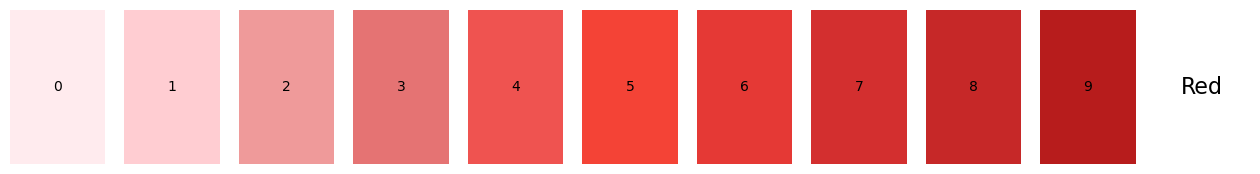

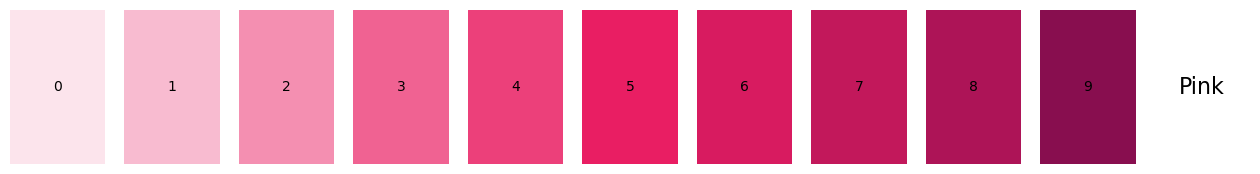

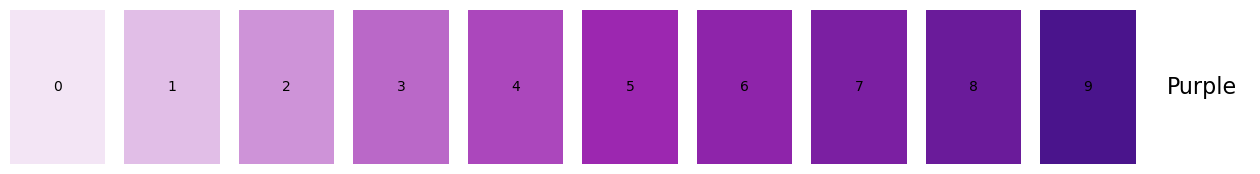

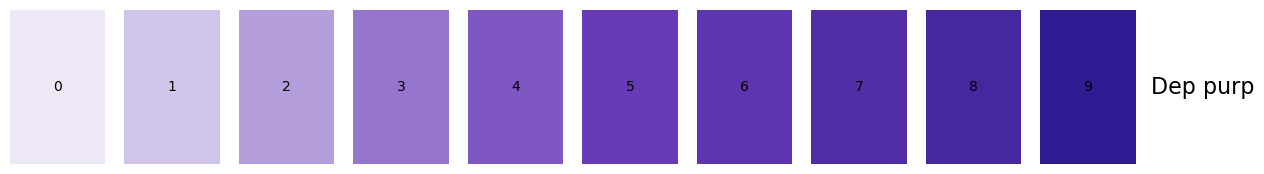

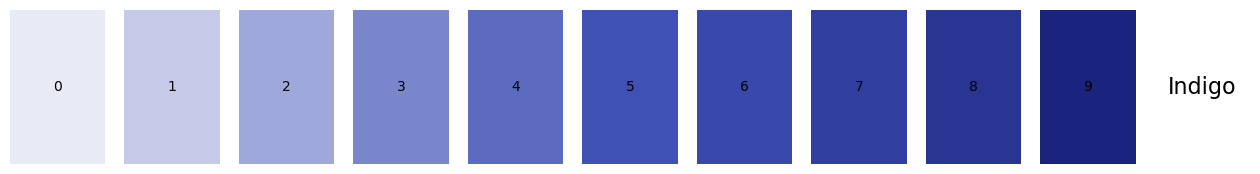

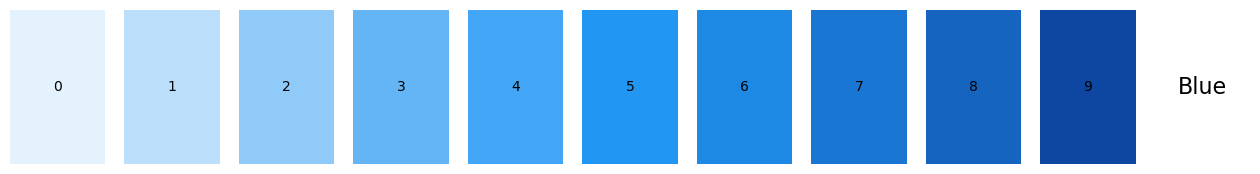

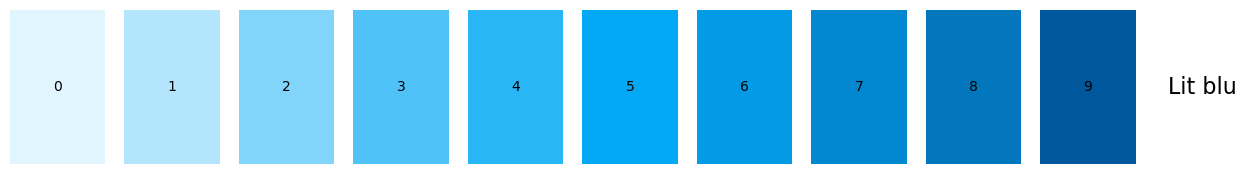

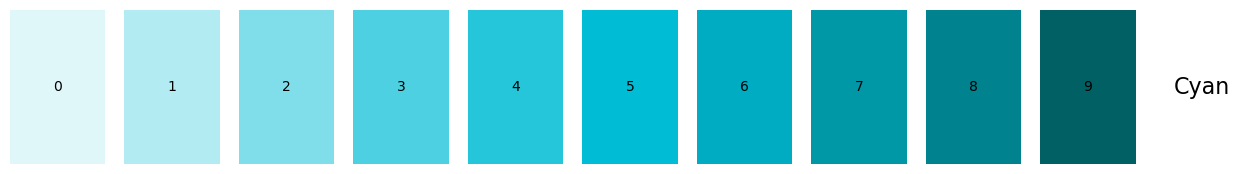

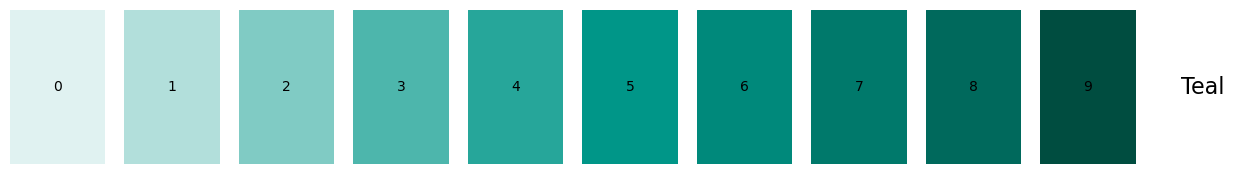

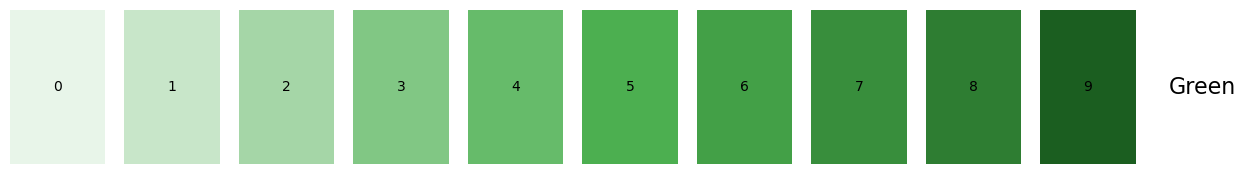

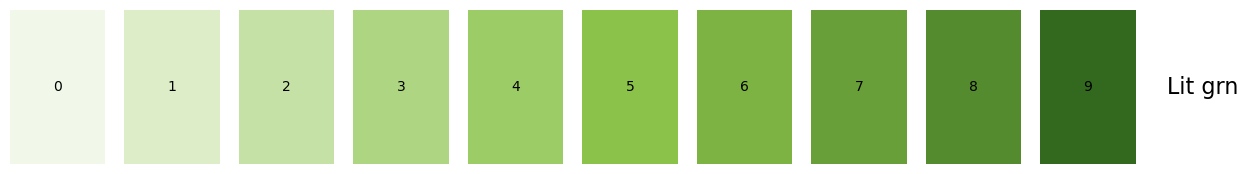

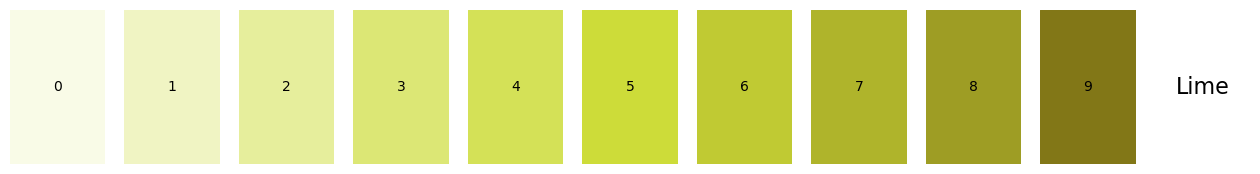

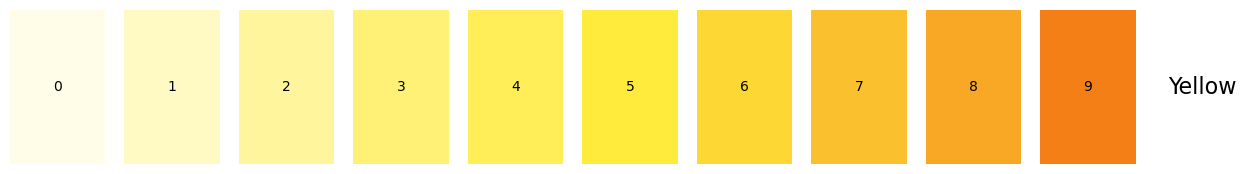

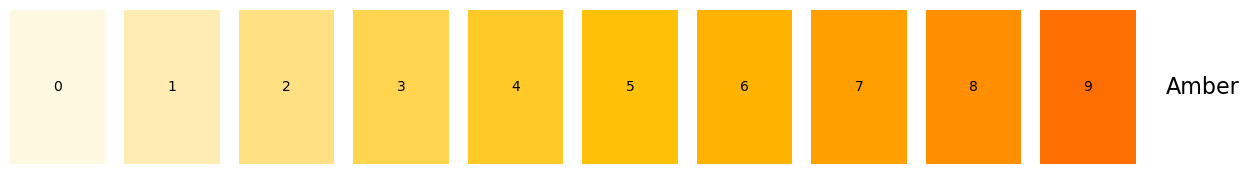

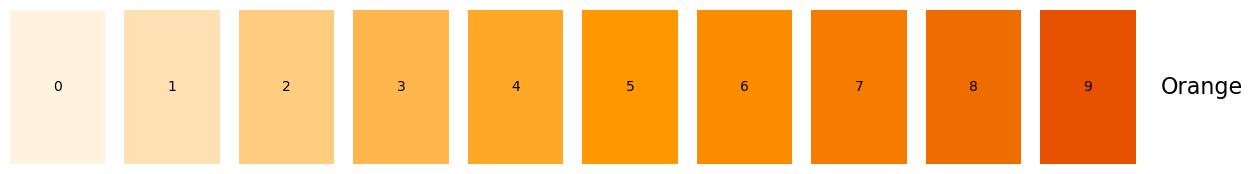

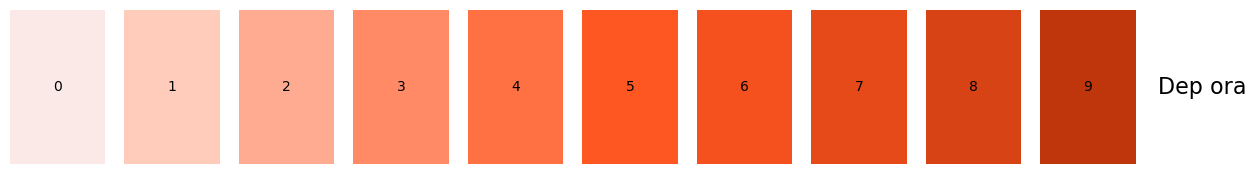

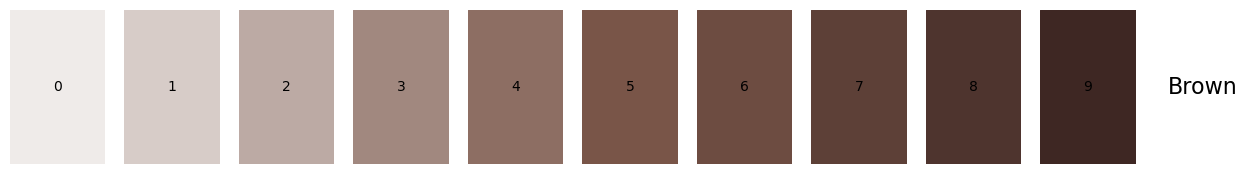

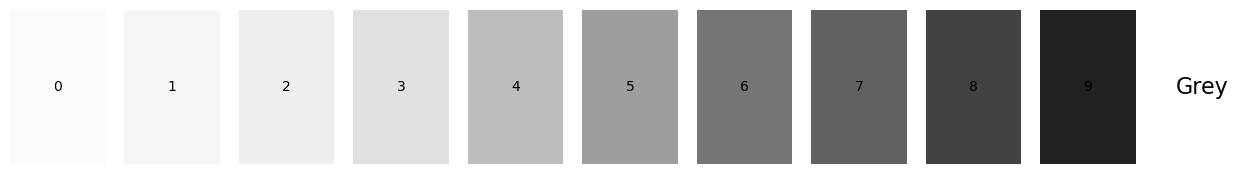

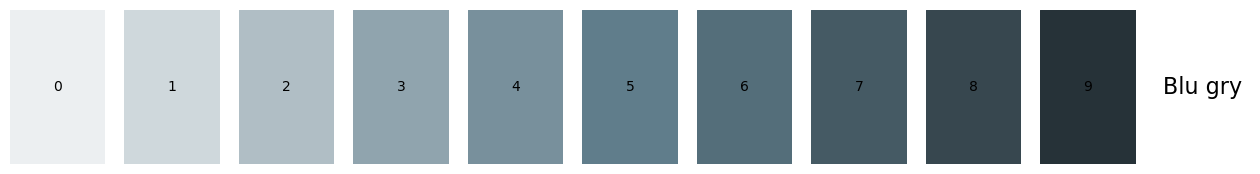

In [3]:
def show_color_palette(colors, title):
    fig, ax = plt.subplots(1, len(colors) + 1, figsize=(16, 2))

    for i, (shade, color_code) in enumerate(colors.items()):
        rgba_color = to_rgba(color_code)
        color_patch = Rectangle((0, 0), 1, 1, color=rgba_color, edgecolor='none')
        ax[i].add_patch(color_patch)
        ax[i].axis('off')
        ax[i].text(0.5, 0.5, shade, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

    ax[-1].text(0.5, 0.5, title, horizontalalignment='center', verticalalignment='center', fontsize=16, color='black')
    ax[-1].axis('off')
    plt.show()

for color, shades in material.items():
    show_color_palette(shades, f"{color.capitalize()}")

<div style="background-color:#4B6587; color:#F0E5CF; padding: 1px; border-radius: 10px;">
    <h2 style="font-size: 16px; margin-left: 10px;">  </h2>
</div>

In [69]:
df = pd.read_csv('minD_data/apo_c1_all.csv')

display(df.head())
print(df.shape)
# print(df['Affinity'].describe())

,Name,SMILES,Affinity
0,MMVGNF-Pf-1116,O=C1N(C(=O)c2cccc3cccc1c23)c4ccc(cc4)c5c6ccccc...,-11.390
1,MMVTCMDC-124223,Oc1cccc(c1)c2nc(c3ccc4oc5ccc(cc5c4c3)c6[nH]c(n...,-11.389
2,MMVSJ000113745,Oc1ccc(cc1)c2nc(c3ccc4oc5ccc(cc5c4c3)c6[nH]c(n...,-11.388
3,MMV000753,Oc1ccc(cc1)c2nc(c3ccc4oc5ccc(cc5c4c3)c6[nH]c(n...,-11.339
4,MMVTCMDC-135910,Fc1cccc(F)c1C(=O)Nc2cccc(c2)c3nn4ccccc4c3c5ccn...,-11.265


(1486, 3)
count    1486.000000
mean       -8.956182
std         0.421948
min       -11.390000
25%        -9.133500
50%        -8.828000
75%        -8.650250
max        -8.523000
Name: Affinity, dtype: float64


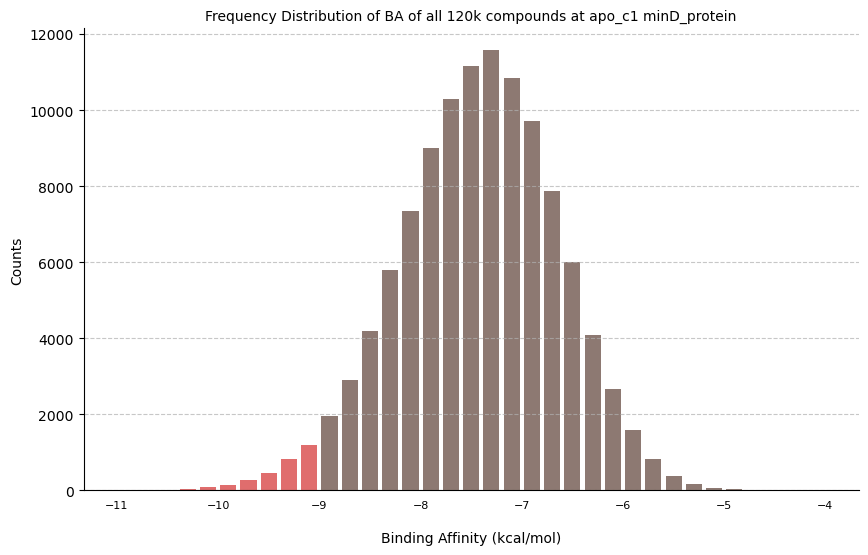

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_affinity_histogram(df, bins=None, range_bounds=(-11.0, -4.0), smooth_factor=10):
    plt.figure(figsize=(10, 6))
    data_range = df['Affinity'].loc[(df['Affinity'] >= range_bounds[0]) & (df['Affinity'] <= range_bounds[1])]
    n, bins, patches = plt.hist(data_range, bins=bins, range=range_bounds, color='#5d4037', rwidth=0.8, alpha=0.7)
    
    # Highlight bins in the range from -9 to -11
    for i, bin_value in enumerate(bins[:-1]):
        if bin_value >= -11 and bin_value <= -9.1:
            patches[i].set_facecolor('#d32f2f')  # Set color for the highlighted bins
    
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    smooth_bin_centers = np.linspace(min(bin_centers), max(bin_centers), len(bin_centers) * smooth_factor)
    spline = make_interp_spline(bin_centers, n, k=3)
    smooth_curve = spline(smooth_bin_centers)
    
    # plt.plot(smooth_bin_centers, smooth_curve, color='#80cbc4', linestyle='-', linewidth=2)
    plt.title('Frequency Distribution of BA of all 120k compounds at apo_c1 minD_protein', fontsize=10)
    plt.xlabel('Binding Affinity (kcal/mol)', labelpad=15)
    plt.ylabel('Counts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # plt.gca().spines['bottom'].set_visible(False)
    # plt.gca().spines['left'].set_visible(False)
    plt.gca().tick_params(left=True, bottom=False)
    plt.xticks(np.arange(-11, -3, step=1), fontsize=8)  # Set major ticks on the x-axis
    plt.savefig("all.png", bbox_inches='tight')
    plt.show()

plot_affinity_histogram(df, bins=35)


In [63]:
def count_affinity_range(df, lower_bound, upper_bound):
    filtered_df = df[(df['Affinity'] >= lower_bound) & (df['Affinity'] <= upper_bound)]
    count = len(filtered_df)
    return count

result = count_affinity_range(df, -11.5, -9.0)
print(result)

3088


.

<div style="background-color:#4B6587; color:#F0E5CF; padding: 5px; border-radius: 10px;">
    <h2 style="font-size: 0px; margin-left: 10px;">  </h2>
</div>

In [129]:
df1 = pd.read_csv('VHL_data/e3_vhl_output.csv')

display(df1.head())
print(df1.shape)
print(df1['Affinity'].describe())

,Name,SMILES,Affinity
0,ligase_LC2451,s1c(NC(=O)c2cc(Oc3ccccc3)ccc2)c(c2c1CCCC2)C#N,-8.717
1,ligase_LC2449,s1c(NC(=O)c2cc(Oc3ccccc3)ccc2)c(c2c1CCC(C2)C)C#N,-8.578
2,ligase_LC916,O=C(Nc1cc(c2nn3c(cc2)nnc3C)ccc1)Cc1c2c(ccc1)cccc2,-8.512
3,ligase_LC2209,Clc1cc(c(cc1)NC(=O)CSc1nccn2c1cc(n2)c1ccccc1)C...,-8.389
4,ligase_LC2384,S1Cc2c(C1)c(n(n2)c1c(cccc1)C)NC(=O)c1ccc(cc1)C...,-8.350


(48, 3)
count    48.000000
mean     -7.892062
std       0.292888
min      -8.717000
25%      -8.028000
50%      -7.784000
75%      -7.662500
max      -7.576000
Name: Affinity, dtype: float64


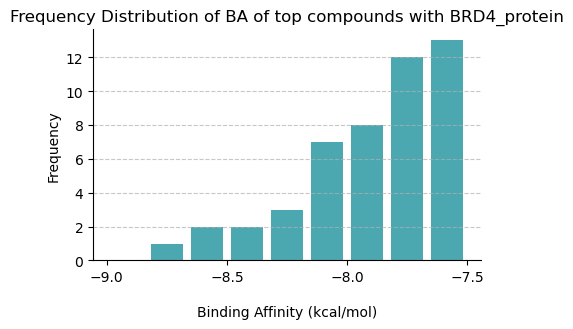

In [133]:
def plot_affinity_histogram(df, bins=20, range_bounds=(-9, -7.5), smooth_factor=10):
    plt.figure(figsize=(5, 3))
    data_range = df['Affinity'].loc[(df['Affinity'] >= range_bounds[0]) & (df['Affinity'] <= range_bounds[1])]
    
    n, bins, patches = plt.hist(data_range, bins=bins, range=range_bounds, color='#00838f', rwidth=0.8, alpha=0.7)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    smooth_bin_centers = np.linspace(min(bin_centers), max(bin_centers), len(bin_centers) * smooth_factor)
    spline = make_interp_spline(bin_centers, n, k=3)
    smooth_curve = spline(smooth_bin_centers)
    
    # plt.plot(smooth_bin_centers, smooth_curve, color='#827717', linestyle='-', linewidth=2)
    plt.title('Frequency Distribution of BA of top compounds with BRD4_protein')
    plt.xlabel('Binding Affinity (kcal/mol)', labelpad=15)
    plt.ylabel('Frequency')
    plt.xticks(np.arange(-9, -7, step=0.5))  
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # plt.gca().spines['bottom'].set_visible(False)
    # plt.gca().spines['left'].set_visible(False)
    plt.gca().tick_params(left=True, bottom=True)  
    plt.savefig("brd4.png", bbox_inches='tight')
    plt.show()

plot_affinity_histogram(df1, bins=9)

In [55]:
def count_affinity_range(df, lower_bound, upper_bound):
    filtered_df = df[(df['Affinity'] >= lower_bound) & (df['Affinity'] <= upper_bound)]
    count = len(filtered_df)
    return count

result = count_affinity_range(df1, -11.5, -10.5)
print(result)

10


.

.

<div style="background-color:#4B6587; color:#F0E5CF; padding: 1px; border-radius: 10px;">
    <h2 style="font-size: 16px; margin-left: 10px;"> Merge All Histogram Plots </h2>
</div>

In [47]:
def plot_affinity_histogram(df, df1):
    def inner_plot(ax, data, bins=None, range_bounds=(-10, -4), color='#004d40', label=''):
        data_range = data['Affinity'].loc[(data['Affinity'] >= range_bounds[0]) & (data['Affinity'] <= range_bounds[1])]
        ax.hist(data_range, bins=bins, range=range_bounds, color=color, rwidth=0.8, alpha=0.7, label=label, edgecolor='black')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)

    fig, ax = plt.subplots(figsize=(10, 6))

    inner_plot(ax, df, bins=24, color='#004d40', label='enamine_antibacterial_ligands')
    inner_plot(ax, df1, bins=24, color='#ff6f00', label='enamine_hinge_ligands')

    plt.xlabel('Binding Affinity (kcal/mol)', labelpad=15)
    plt.legend(loc='upper right')
    plt.show()

plot_affinity_histogram(df, df1)